<a href="https://colab.research.google.com/github/WanpinCai/Distributed_SmartBuildingSystem/blob/main/polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Polynomial Regression**

**Importing the libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


**Importing the dataset**

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("akram24/position-salaries")

print("Path to dataset files:", path)

100%|██████████| 333/333 [00:00<00:00, 141kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/akram24/position-salaries/versions/1


In [ ]:
dataset_path = '/root/.cache/kagglehub/datasets/akram24/position-salaries/versions/1/Position_Salaries.csv'
dataset = pd.read_csv(dataset_path)
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

**Training the Linear regression model on the whole dataset**

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

**Training the Polynomial regression model on the whole dataset**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

**Visualising the linear regression results**

Text(0, 0.5, 'Salary')

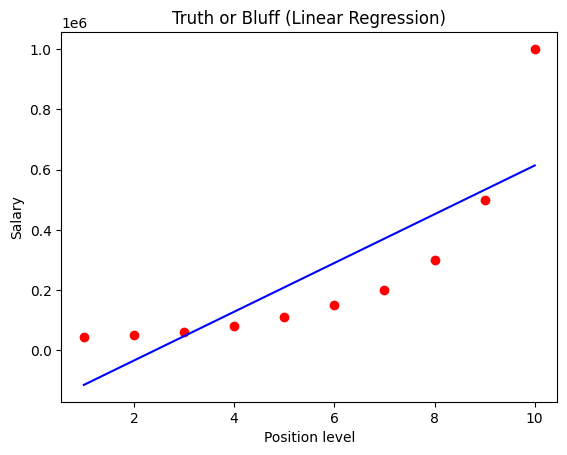

In [ ]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')

**Visualising the Polynomial regression results**

Text(0, 0.5, 'Salary')

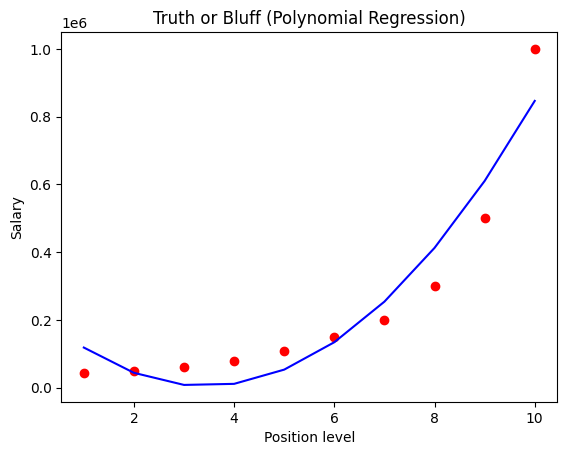

In [ ]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')

**Visualising the Polynomial regression results(for higher resolution and smoother curve)**


<ipython-input-12-ae3c98756d2f>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


Text(0, 0.5, 'Salary')

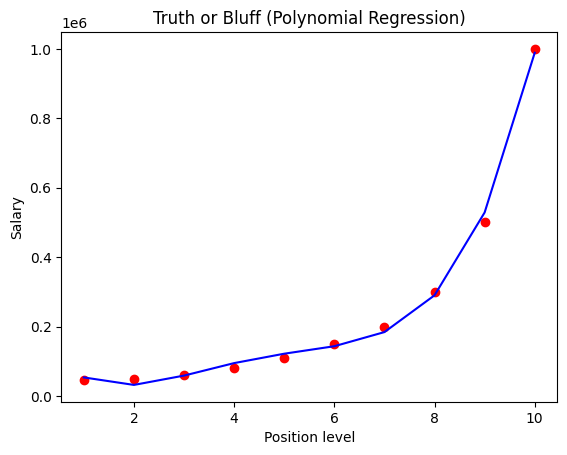

In [ ]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')

**Predicting a new result with linear regression**

In [ ]:
lin_reg.predict([[6.5]])

array([330378.78787879])

**Predicting a new result with Polynomial regression**

In [ ]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265155])

**Evaluating the Model Performance**

In [ ]:
from sklearn.metrics import r2_score
y_pred = lin_reg_2.predict(poly_reg.fit_transform(X))
r2_score(y, y_pred)